In [1]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.8/220.8 kB 4.9 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.8.2.2-cp310-cp310-macosx_11_0_arm64.whl size=155788 sha256=7ad4f7613758c80f7f7f43eb11ab126f0057149460e900f98afabed762596ce1
  Stored in directory: /Users/billy/Library/Caches/pip/wheels/30/52/73/36458d38e3c533678a3043949ad72658025d8e89d942439d49
Successfully built wordcloud

[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [9]:
from wordcloud import STOPWORDS
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
import string
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

In [135]:
df = pd.read_csv('/Users/billy/code/copy folder/youtube_optimizer/RawData/finalesterest.csv')

In [139]:
from math import log

In [140]:
df_copy = df.copy()

In [143]:
df_copy.views = df_copy.views.apply(lambda x: log(x+1))

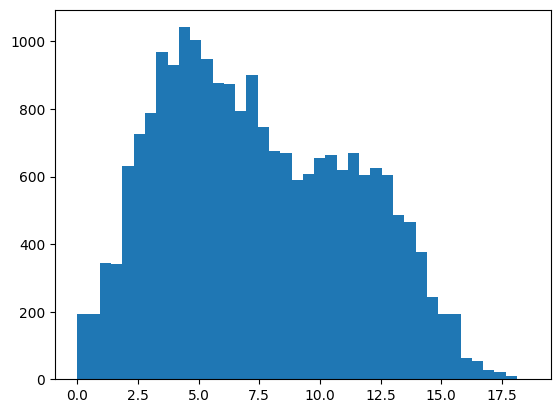

In [149]:
plt.hist(df_copy.views, bins=40);

In [150]:
df.views.min()

0

In [151]:
df.views.max()

118885715

In [157]:
len(df)

21430

In [174]:
ten_percent= int(len(df)/10)

df_top10 = df.nlargest(ten_percent, 'views')

In [177]:
df_top10

,Unnamed: 0.1,Unnamed: 0,id,channel_id,category_id,country,channel_viewCount,channel_subscriberCount,channel_videoCount,title,published,views,duration
17998,7027,0,7Wmq2XZptQw,UCF5Rp2ghzXsX6vwYqa7aepg,26.0,US,9.077534e+08,1450000.0,809.0,Ripped your pants? Not a problem! #shorts,2022-11-09T16:25:29Z,118885715,PT59S
1470,1470,0,7Wmq2XZptQw,UCF5Rp2ghzXsX6vwYqa7aepg,26.0,US,9.077534e+08,1440000.0,807.0,Ripped your pants? Not a problem! #shorts,2022-11-09T16:25:29Z,117382677,PT59S
7999,7999,0,mMkKMFGEWlE,UCg0e8IQiJ62_t2Aef1woA0Q,28.0,IN,1.587888e+08,2340000.0,123.0,wait for end l #shorts #whatif #uniqueexperim...,2022-11-07T13:12:31Z,74294612,PT55S
6829,6829,0,qmWwrT91rfY,UCoGForHQAmk0_9rI9CABeYw,24.0,GB,7.978823e+09,10700000.0,767.0,The perfect dotted line challenge,2022-11-10T09:51:21Z,71271941,PT1M1S
16863,5892,0,_y5XsdEUPpI,UCY-at5vWhDoMJ8y0kIPFwDA,24.0,IN,7.873238e+09,15500000.0,465.0,Family love ❤️🥺 #shorts #azhan5star #youtube,2022-10-31T10:57:54Z,70209597,PT1M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6431,6431,0,8UeCIhKG2FQ,UCq18eeL7D9Vd8DhjMcLh9QQ,24.0,GB,9.927235e+08,1140000.0,10667.0,Susanna Reid Shuts Down Just Stop Oil Activist...,2022-11-09T13:20:03Z,447335,PT9M33S
3752,3752,0,MMf5Fz7Tn_I,UCsCy3274qvLzrbq9vGYLCpg,27.0,US,4.697463e+07,184000.0,96.0,Windstorm in the Desert +More | Super Rescue T...,2022-11-11T12:00:22Z,446809,PT50M27S
14013,3042,0,5SRnfCBN9Cs,UCNAf1k0yIjyGu3k9BwAg3lg,17.0,GB,2.945686e+09,4140000.0,8165.0,Ramsey scores to ease pressure off Gerrard | A...,2022-09-16T21:21:46Z,446675,PT2M37S
600,600,0,MMf5Fz7Tn_I,UCsCy3274qvLzrbq9vGYLCpg,27.0,US,4.697463e+07,184000.0,96.0,Windstorm in the Desert +More | Super Rescue T...,2022-11-11T12:00:22Z,446349,PT50M27S


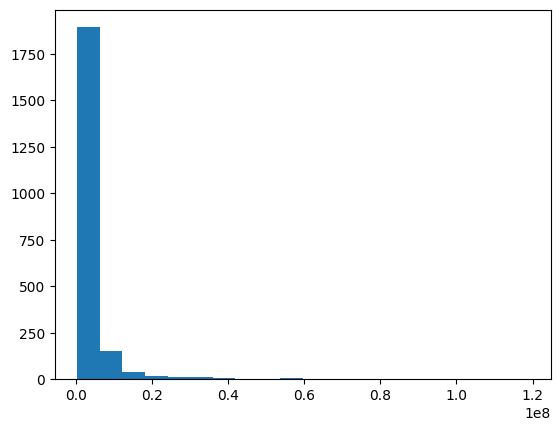

In [176]:
plt.hist(df_top10.views, bins=20);

In [178]:
def text_cleaner_and_splitter(text):
    return (text.lower()
            .replace('❤️', ' heart ').replace('💯', ' 100 ').replace('❤', ' heart ')
            .replace('🙏', ' pray ').replace('😘', ' kiss ').replace('🤗', ' happy ')
            .replace('💥', ' boom ').replace('✔️', ' like ').replace('😍', ' love ')
            .replace('🐱', ' cat ').replace('💔', ' broken heart ').replace('😵', ' confused ') 
            .replace('😄', ' awesome ').replace('👍', ' thumbs up ').replace('😎', ' cool ')
            .replace('🐷', ' pig ').replace('🤘', " rock'n roll ").replace('🤣', ' laughing hard ')
            .replace('😩', ' oh no ').replace('💎', ' diamond ').replace('😊', ' nice ')
            .replace('☺️', ' very nice ').replace('🙃', ' upside down smile ').replace('🤔', ' not sure ')
            .replace('😂', ' laughing ').replace('🙋🏻‍♀️',' hi ').replace('🥰', ' lovely ').replace('🥺',' sad ')
            .replace('!!!!', '!').replace('!!!', '!').replace('!!', '!').replace('!',' ! ')
            .replace('????', '?').replace('???', '?').replace('??', '?').replace('?',' ? ')
            .replace('oooo','o').replace('oooo','o').replace('ooo','o')
            .replace('..','...').replace('......','...').replace('....','...').replace('....','...').replace('...',' ... ')
            .replace('.',' . ').replace('. . .', ' ... ')
            .replace("'", " ").replace('"', ' ')
            .replace('    ', ' ').replace('   ', ' ').replace('  ', ' '))
            #.split())

In [179]:
def preprocessing(sentence):
#     Lower
    sentence = sentence.lower()

#     punctuation
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, '')

#   no numbers
    sentence = ''.join(char for char in sentence if not char.isdigit())

#     sentence = emoji_strip(sentence)

    clean_titles = lemmatize(sentence)

    return clean_titles


In [180]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [181]:
def lemmatize(text):
    # Lemmatizing the verbs
    verb_lemmatized = [
        WordNetLemmatizer().lemmatize(word, pos = "v") # v --> verbs
        for word in text
    ]

# 2 - Lemmatizing the nouns
    noun_lemmatized = [
        WordNetLemmatizer().lemmatize(word, pos = "n") # n --> nouns
        for word in text
    ]
    return text

In [182]:
df_top10.title = df_top10.title.apply(text_cleaner_and_splitter)

In [183]:
df_top10.head()

,Unnamed: 0.1,Unnamed: 0,id,channel_id,category_id,country,channel_viewCount,channel_subscriberCount,channel_videoCount,title,published,views,duration
17998,7027,0,7Wmq2XZptQw,UCF5Rp2ghzXsX6vwYqa7aepg,26.0,US,9.077534e+08,1450000.0,809.0,ripped your pants ? not a problem ! #shorts,2022-11-09T16:25:29Z,118885715,PT59S
1470,1470,0,7Wmq2XZptQw,UCF5Rp2ghzXsX6vwYqa7aepg,26.0,US,9.077534e+08,1440000.0,807.0,ripped your pants ? not a problem ! #shorts,2022-11-09T16:25:29Z,117382677,PT59S
7999,7999,0,mMkKMFGEWlE,UCg0e8IQiJ62_t2Aef1woA0Q,28.0,IN,1.587888e+08,2340000.0,123.0,wait for end l #shorts #whatif #uniqueexperime...,2022-11-07T13:12:31Z,74294612,PT55S
6829,6829,0,qmWwrT91rfY,UCoGForHQAmk0_9rI9CABeYw,24.0,GB,7.978823e+09,10700000.0,767.0,the perfect dotted line challenge,2022-11-10T09:51:21Z,71271941,PT1M1S
16863,5892,0,_y5XsdEUPpI,UCY-at5vWhDoMJ8y0kIPFwDA,24.0,IN,7.873238e+09,15500000.0,465.0,family love heart sad #shorts #azhan5star #you...,2022-10-31T10:57:54Z,70209597,PT1M


In [184]:
df_top10.title = df_top10.title.apply(preprocessing)

In [186]:
df_top10.head()

,Unnamed: 0.1,Unnamed: 0,id,channel_id,category_id,country,channel_viewCount,channel_subscriberCount,channel_videoCount,title,published,views,duration
17998,7027,0,7Wmq2XZptQw,UCF5Rp2ghzXsX6vwYqa7aepg,26.0,US,9.077534e+08,1450000.0,809.0,ripped your pants not a problem shorts,2022-11-09T16:25:29Z,118885715,PT59S
1470,1470,0,7Wmq2XZptQw,UCF5Rp2ghzXsX6vwYqa7aepg,26.0,US,9.077534e+08,1440000.0,807.0,ripped your pants not a problem shorts,2022-11-09T16:25:29Z,117382677,PT59S
7999,7999,0,mMkKMFGEWlE,UCg0e8IQiJ62_t2Aef1woA0Q,28.0,IN,1.587888e+08,2340000.0,123.0,wait for end l shorts whatif uniqueexperiment ...,2022-11-07T13:12:31Z,74294612,PT55S
6829,6829,0,qmWwrT91rfY,UCoGForHQAmk0_9rI9CABeYw,24.0,GB,7.978823e+09,10700000.0,767.0,the perfect dotted line challenge,2022-11-10T09:51:21Z,71271941,PT1M1S
16863,5892,0,_y5XsdEUPpI,UCY-at5vWhDoMJ8y0kIPFwDA,24.0,IN,7.873238e+09,15500000.0,465.0,family love heart sad shorts azhanstar youtube,2022-10-31T10:57:54Z,70209597,PT1M


In [189]:
def smash(df):
    bigguns = df.title.tolist()
    joined_bigguns = ' '.join(x for x in bigguns)
    return joined_bigguns

In [190]:
all_text = smash(df_top10)

In [193]:
stripped_all = text_cleaner_and_splitter(all_text)
stripped_all

'ripped your pants not a problem shorts ripped your pants not a problem shorts wait for end l shorts whatif uniqueexperiment majedar the perfect dotted line challenge family love heart sad shorts azhanstar youtube cute love story love heart gulshan kalra shorts how to hold a newborn like a pro the baby doctorshorts ytshorts babyvideos tipsandtricks taking care of mommy long legs make up transformation by one more shorts taking care of mommy long legs make up transformation by one more shorts taking care of mommy long legs make up transformation by one more shorts taking care of mommy long legs make up transformation by one more shorts tom and jerry rithviampkavijim 🏋️ end twist laughing shorts how moses really split the red sea 🌊 🤯 dekho last m kya huashorts trending viral thegeetagurjar youtubeshorts giving my old drawing a ‘glow up’✨\U0001fae3 inspired by uno afrah giving my old drawing a ‘glow up’✨\U0001fae3 inspired by uno afrah woh measurements lene ayaa hain srikanta hoichoi i ca

In [194]:
from wordcloud import STOPWORDS

In [195]:
type(STOPWORDS)

set

In [199]:
updated = ['short', 'amp', 'v', 'video', 'shorts', 'dhar']
STOPWORDS.update(updated)

In [200]:
len(STOPWORDS)

206

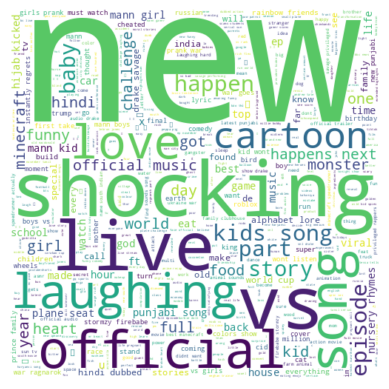

In [202]:
wc = WordCloud(background_color="white", max_words=2000,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=500, height=500)
wc.generate(stripped_all)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [205]:
def one_color_func(word=None, font_size=None, 
                   position=None, orientation=None, 
                   font_path=None, random_state=None):
    h = 5 # 0 - 360
    s = 83 # 0 - 100
    l = 53 # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)

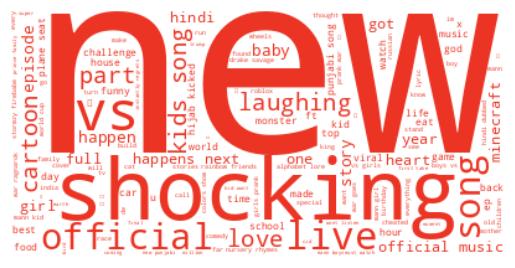

In [208]:
wc = WordCloud(stopwords=STOPWORDS,
               background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, color_func=one_color_func)
wc.generate(stripped_all)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [209]:
# font_path = 'path/to/font'
# wc = WordCloud(stopwords=STOPWORDS, font_path=font_path, 
#                background_color="white", max_words=2000,
#                max_font_size=256, random_state=42,
#                width=500, height=500)
# wc.generate(stripped_all)
# plt.imshow(wc, interpolation="bilinear")
# plt.axis('off')
# plt.show()

In [210]:
from PIL import Image
import numpy as np